In [ ]:
# Cài đặt thư viện kaggle để sử dụng công cụ Kaggle CLI.
# Kaggle CLI giúp truy cập, tải dữ liệu, và tương tác với
# các tài nguyên trên Kaggle một cách trực tiếp từ dòng lệnh.
!pip install kaggle

In [ ]:
import kagglehub
import pandas as pd
pd.set_option('display.max_columns', None)
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [ ]:
hientrandai_chicago_traffic_crashes_dataset_path = kagglehub.dataset_download('hientrandai/chicago-traffic-crashes-dataset')

100%|██████████| 118M/118M [00:03<00:00, 38.1MB/s]

Extracting files...


# Chuẩn bị dữ liệu

In [ ]:
# mkdir -p: Tạo thư mục .kaggle trong thư mục chính của người dùng
# (nếu nó chưa tồn tại).
# ~/.kaggle: Đây là vị trí mà Kaggle CLI yêu cầu để lưu trữ file
# kaggle.json. Thư mục này sẽ chứa API token của bạn.
!mkdir -p ~/.kaggle

# Thuộc thư viện google.colab, dùng để tải file từ máy tính cá nhân
# lên môi trường Google Colab.
files.upload() # Tải lên tệp kaggle.json từ tài khoản Kaggle

# Di chuyển tệp kaggle.json vào thư mục .kaggle
# !cp: Lệnh sao chép file trên hệ thống Linux.
# kaggle.json: File chứa API Token, được tải lên từ máy tính (hiện nằm
# trong thư mục /content).
!cp kaggle.json ~/.kaggle/

# Thiết lập quyền truy cập bảo mật cho kaggle.json
# chmod 600: Thiết lập quyền truy cập file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle kernels output hientrandai/data-cleaning -p /content/output

Output file downloaded to /content/output/cleaned_crashes.csv
Output file downloaded to /content/output/cleaned_people.csv
Output file downloaded to /content/output/cleaned_vehicles.csv
Kernel log downloaded to /content/output/data-cleaning.log 


Bộ dữ liệu Cleaned Crashes

In [ ]:
# Đường dẫn đến file
cleaned_crashes_data_path = '/content/output/cleaned_crashes.csv'

# Đọc file
cleaned_crashes_df = pd.read_csv(cleaned_crashes_data_path)
cleaned_crashes_df.head()

,crash_record_id,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,damage,prim_contributory_cause,sec_contributory_cause,num_units,most_severe_injury,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,crash_month,latitude,longitude
0,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,2023-07-29T14:45:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",4,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.854120,-87.665902
1,fd05285e9d273fe20cbbebf84794045828a2ba589073b6...,2023-07-29T14:30:00.000Z,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,0.0,14,7,7,41.809781,-87.594213
2,fda2491d33ac819033f4aaa7ed901120f2f6785b7e5bbb...,2023-07-29T00:50:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,NO INDICATION OF INJURY,0.0,0.0,0,7,7,41.899225,-87.696642
3,4a1f7a24129e5e1d4a7a2fd44ab6f8822a20bcdb2f627f...,2023-08-13T10:10:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3,NO INDICATION OF INJURY,0.0,0.0,10,1,8,41.975853,-87.709134
4,1ee2180a89cc02c0b756f95b5b2755bb5cc9d93450f5ca...,2023-08-09T19:55:00.000Z,30,TRAFFIC SIGNAL,FUNCTIONING IMPROPERLY,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2,NONINCAPACITATING INJURY,5.0,0.0,19,4,8,41.758246,-87.626522


CRASH_RECORD_ID: Mã định danh cho mỗi vụ tai nạn

CRASH_DATE: Ngày xảy ra tại nạn

POSTED_SPEED_LIMIT: Giới hạn tốc độ vị trí xảy ra tai nạn

TRAFFIC_CONTROL_DEVICE: Loại hình thức điều khiển giao thông

DEVICE_CONDITION: Tình trạng thiết bị điều khiển giao thông

WEATHER_CONDITION: Tình trạng thời tiết

LIGHTING_CONDITION: Điều kiện ánh sáng

FIRST_CRASH_TYPE: Loại tai nạn đầu tiên xảy ra

TRAFFICWAY_TYPE: Loại đuờng giao thông

ALIGNMENT: Sự định tuyến của làn đuờng

ROADWAY_SURFACE_COND: Điều kiện bề mặt đường

ROAD_DEFECT: Lỗi trên bề mặt đuờng

DAMAGE: Thiệt hại

PRIM_CONTRIBUTORY_CAUSE: Nguyên nhân chính gây tai nạn

SEC_CONTRIBUTORY_CAUSE: Nguyên nhân phụ gây tai nạn

NUM_UNITS: Tổng số phương tiện liên quan đến vụ tai nạn

MOST_SEVERE_INJURY: Mức độ thương tích nghiêm trọng nhất

INJURIES_TOTAL: Tổng số người bị thương trong vụ tai nạn

INJURIES_FATAL: Tổng số người tử vong trong vụ tai nạn

CRASH_HOUR: Giờ mà tai nạn xảy ra

CRASH_DAY_OF_WEEK: Ngày trong tuần xảy ra tai nạn

CRASH_MONTH: Tháng xảy ra tai nạn

LATITUDE: Vĩ độ xảy ra tai nạn

LONGITUDE: Kinh độ xảy ra tai nạn

Bộ dữ liệu Cleaned People

In [ ]:
# Đường dẫn đến file
cleaned_people_data_path = '/content/output/cleaned_people.csv'

# Đọc file
cleaned_people_df = pd.read_csv(cleaned_people_data_path)
cleaned_people_df.head()

,person_id,person_type,crash_record_id,vehicle_id,crash_date,sex,age,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,physical_condition
0,O1304796,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239150.0,2022-03-25T05:10:00.000Z,M,28.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,NONE,NORMAL
1,O1304797,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239154.0,2022-03-25T05:10:00.000Z,M,27.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NORMAL
2,O1304798,DRIVER,91a50c583a041e524a0807626ebcc57cc302a97270d160...,1239149.0,2022-03-25T04:45:00.000Z,X,22.6,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,UNKNOWN
3,O1304802,DRIVER,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,1239156.0,2022-03-25T04:54:00.000Z,F,29.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,OTHER,IMPAIRED - DRUGS
4,O1304805,DRIVER,333437e5d862419154c01b6583c662385867e7efc8faf8...,1239155.0,2022-03-25T05:47:00.000Z,M,58.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL


PERSON_ID: Mã định danh mỗi người

PERSON_TYPE: Loại nguời tham gia tai nạn

CRASH_RECORD_ID: Mã định danh cho mỗi vụ tai nạn

VEHICLE_ID: Mã số phương tiện

CRASH_DATE: Ngày xảy ra tai nạn

SEX: Giới tính

AGE: Tuổi

SAFETY_EQUIPMENT: Thiết bị an toàn

AIRBAG_DEPLOYED: Tình trạng kích hoạt túi khí

EJECTION: Tình trạng văng khỏi xe

INJURY_CLASSIFICATION: Phân loại mức độ thương tích

DRIVER_ACTION: Hành động của tài xế dẫn đến tai nạn

PHYSICAL_CONDITION: Tình trạng thể chất



Bộ dữ liệu Cleaned Vehicles

In [ ]:
# Đường dẫn đến file
cleaned_vehicles_data_path = '/content/output/cleaned_vehicles.csv'

# Đọc file
cleaned_vehicles_df = pd.read_csv(cleaned_vehicles_data_path)
cleaned_vehicles_df.head()

,crash_unit_id,crash_record_id,crash_date,unit_no,unit_type,vehicle_id,make,model,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,2023-12-06T15:24:00.000Z,1,DRIVER,1634931.0,NISSAN,SENTRA,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2023-12-06T16:00:00.000Z,2,DRIVER,1634978.0,CHRYSLER,SEBRING,PASSENGER,PERSONAL,S,PASSING/OVERTAKING,1.0,REAR-RIGHT-CORNER
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,2023-12-06T16:30:00.000Z,1,DRIVER,1634948.0,SUBARU,OUTBACK,PASSENGER,PERSONAL,W,TURNING RIGHT,1.0,FRONT
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10T12:12:00.000Z,1,DRIVER,1637401.0,TOYOTA,RAV4,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,SIDE-LEFT-FRONT
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10T12:12:00.000Z,2,DRIVER,1637408.0,SUBARU,OUTBACK,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER


CRASH_UNIT_ID: Mã định danh cho mỗi đơn vị tham gia tai nạn

CRASH_RECORD_ID: Mã định danh cho mỗi vụ tai nạn

CRASH_DATE: Ngày xảy ra tại nạn

UNIT_NO: Mã số duy nhất cho mỗi đơn vị trong một báo cáo tai nạn

VEHICLE_ID: Mã số phương tiện

MAKE: Hãng xe

MODEL: Mẫu xe

VEHICLE_TYPE: Loại phương tiện

VEHICLE_USE: Mục đích sử dụng phương tiện

TRAVEL_DIRECTION: Hướng di chuyển

MANEUVER: Hành động mà đơn vị đang thực hiện trước khi xảy ra tai nạn


OCCUPANT_CNT: Số người trên phương tiện

FIRST_CONTACT_POINT: Vị trí đầu tiên trên phương tiện bị tác động trong vụ tai nạn

In [ ]:
# cleaned_vehi3cles_df.to_csv('vehicle.csv', index=False)
# files.download('vehicle.csv')

In [ ]:
cleaned_crashes_df.to_csv('crash.csv', index=False)
files.download('crash.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Phân tích bộ dữ liệu People

## Kịch bản 01:  Phân Tích Nhân Khẩu Học

**Kịch bản:** Phân tích phân bố của SEX (Giới tính) và AGE (Tuổi) của những người tham gia tai nạn. Xác định nhóm tuổi và giới tính nào thường gặp tai nạn nhất.

**Thông tin rút ra:** Giúp xác định nhóm đối tượng có nguy cơ cao và xây dựng các chiến dịch nâng cao nhận thức phù hợp.

In [ ]:
cleaned_people_df.head(5)

,person_id,person_type,crash_record_id,vehicle_id,crash_date,sex,age,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,physical_condition
0,O1304796,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239150.0,2022-03-25T05:10:00.000Z,M,28.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,NONE,NORMAL
1,O1304797,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239154.0,2022-03-25T05:10:00.000Z,M,27.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NORMAL
2,O1304798,DRIVER,91a50c583a041e524a0807626ebcc57cc302a97270d160...,1239149.0,2022-03-25T04:45:00.000Z,X,22.6,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,UNKNOWN
3,O1304802,DRIVER,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,1239156.0,2022-03-25T04:54:00.000Z,F,29.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,OTHER,IMPAIRED - DRUGS
4,O1304805,DRIVER,333437e5d862419154c01b6583c662385867e7efc8faf8...,1239155.0,2022-03-25T05:47:00.000Z,M,58.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL


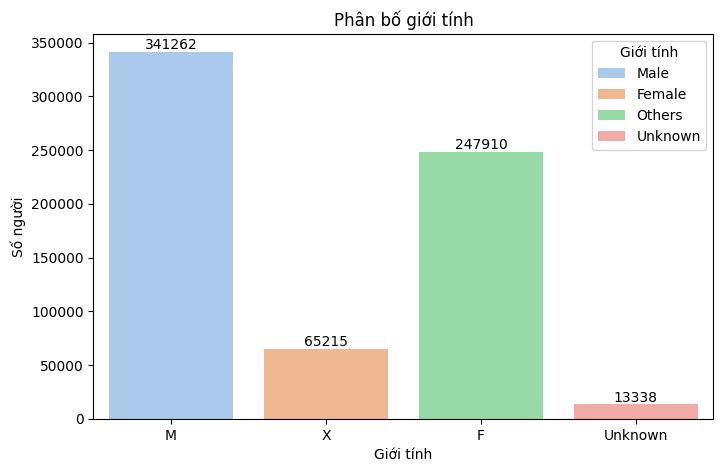

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sex', data=cleaned_people_df, palette='pastel')

# Thêm giá trị ở trên mỗi cột
for container in ax.containers:
  ax.bar_label(container, fmt='%.0f', label_type='edge')

# Thêm tiêu đề và nhãn
plt.title('Phân bố giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số người')

# Thêm chú thích
labels = ['Male', 'Female', 'Others', 'Unknown']
plt.legend(ax.containers, labels, title='Giới tính', loc='upper right')

plt.show()

**Nhận xét**:
* Giới tính Nam và Nữ chiếm số lượng đa số.
* Các giới tính khác và nhóm người không khai báo giới tính chiếm tỉ lệ nhỏ hơn 2 giới tính còn lại.

Phân bố nhóm tuổi

In [ ]:
cleaned_people_df['age'].dropna(inplace=True)

In [ ]:
cleaned_people_df['age'].value_counts()

,count
age,
21-30,181026
31-40,166322
41-50,150065
51-60,60884
61-70,39789
11-20,32324
0-10,16788
71-80,15934
81-90,4155


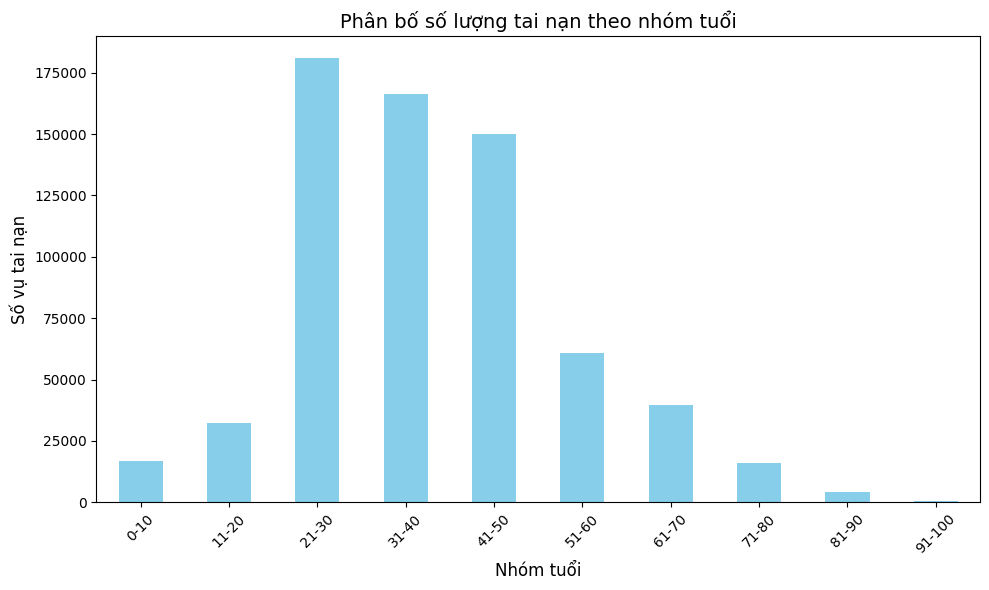

In [ ]:
# Tính phân bố nhóm tuổi
age_group_distribution = cleaned_people_df['age'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ nhóm tuổi
age_group_distribution.plot(kind='bar', color='skyblue')
plt.title('Phân bố số lượng tai nạn theo nhóm tuổi', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Số vụ tai nạn', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Nhận xét**:

* **Nhóm tuổi có nguy cơ cao nhất:** Nhóm tuổi 21-30 có số vụ tai nạn cao nhất, vượt trội so với các nhóm khác.

* **Nhóm nguy cơ cao tiếp theo:** Nhóm 31-40 và 41-50 cũng có số lượng tai nạn tương đối cao, chỉ thấp hơn nhóm 21-30.

* **Nhóm nguy cơ thấp:** Nhóm 0-10, 81-90, và 91-100 có số vụ tai nạn rất thấp.



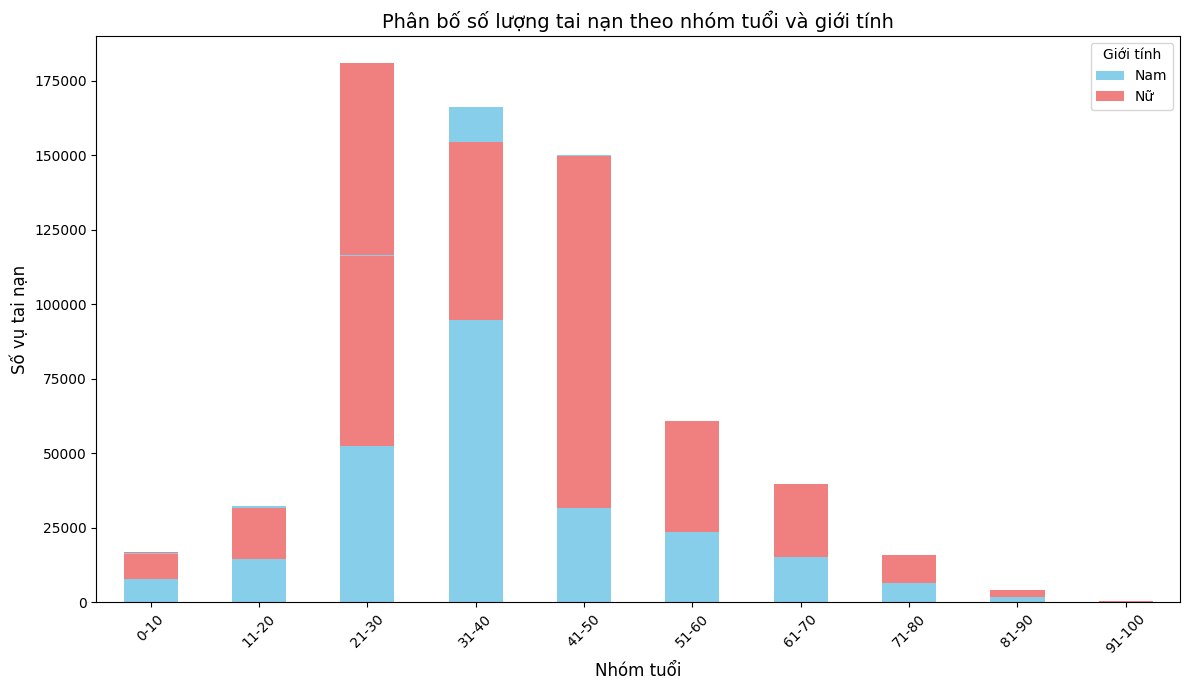

In [ ]:
# Tính phân phối theo nhóm tuổi và giới tính
age_sex_distribution = cleaned_people_df.groupby(['age', 'sex']).size().unstack(fill_value=0)

# Vẽ biểu đồ phân phối
age_sex_distribution.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'lightcoral'])
plt.title('Phân bố số lượng tai nạn theo nhóm tuổi và giới tính', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Số vụ tai nạn', fontsize=12)
plt.legend(title='Giới tính', labels=['Nam', 'Nữ'], fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

**Kết luận**: Trong hầu hết các nhóm tuổi, số vụ tai nạn của nữ giới cao hơn so với nam giới, đặc biệt rõ ràng trong nhóm 21-30 và 41-50.


## Kịch bản 02: Phân Tích Mức Độ Thương Tích

**Kịch bản:** Nghiên cứu cách SAFETY_EQUIPMENT (Thiết bị an toàn), AIRBAG_DEPLOYED (Túi khí kích hoạt), và EJECTION (Tình trạng văng khỏi xe) ảnh hưởng đến INJURY_CLASSIFICATION (Phân loại mức độ thương tích).

**Thông tin rút ra:** Đánh giá hiệu quả của các biện pháp an toàn như dây an toàn và túi khí trong việc giảm thương tích nghiêm trọng.

In [ ]:
cleaned_people_df.head(5)

,person_id,person_type,crash_record_id,vehicle_id,crash_date,sex,age,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,physical_condition
0,O1304796,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239150.0,2022-03-25T05:10:00.000Z,M,28.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,NONE,NORMAL
1,O1304797,DRIVER,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,1239154.0,2022-03-25T05:10:00.000Z,M,27.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NORMAL
2,O1304798,DRIVER,91a50c583a041e524a0807626ebcc57cc302a97270d160...,1239149.0,2022-03-25T04:45:00.000Z,X,22.6,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,FAILED TO YIELD,UNKNOWN
3,O1304802,DRIVER,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,1239156.0,2022-03-25T04:54:00.000Z,F,29.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NO INDICATION OF INJURY,OTHER,IMPAIRED - DRUGS
4,O1304805,DRIVER,333437e5d862419154c01b6583c662385867e7efc8faf8...,1239155.0,2022-03-25T05:47:00.000Z,M,58.0,USAGE UNKNOWN,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NONE,NORMAL


In [ ]:
# Phân bố thương tích theo safety_equipment
safety_injury_distribution = cleaned_people_df.groupby(['safety_equipment', 'injury_classification']).size().unstack(fill_value=0)

# Phân bố thương tích theo airbag_deployed
airbag_injury_distribution = cleaned_people_df.groupby(['airbag_deployed', 'injury_classification']).size().unstack(fill_value=0)

# Phân bố thương tích theo ejection
ejection_injury_distribution = cleaned_people_df.groupby(['ejection', 'injury_classification']).size().unstack(fill_value=0)


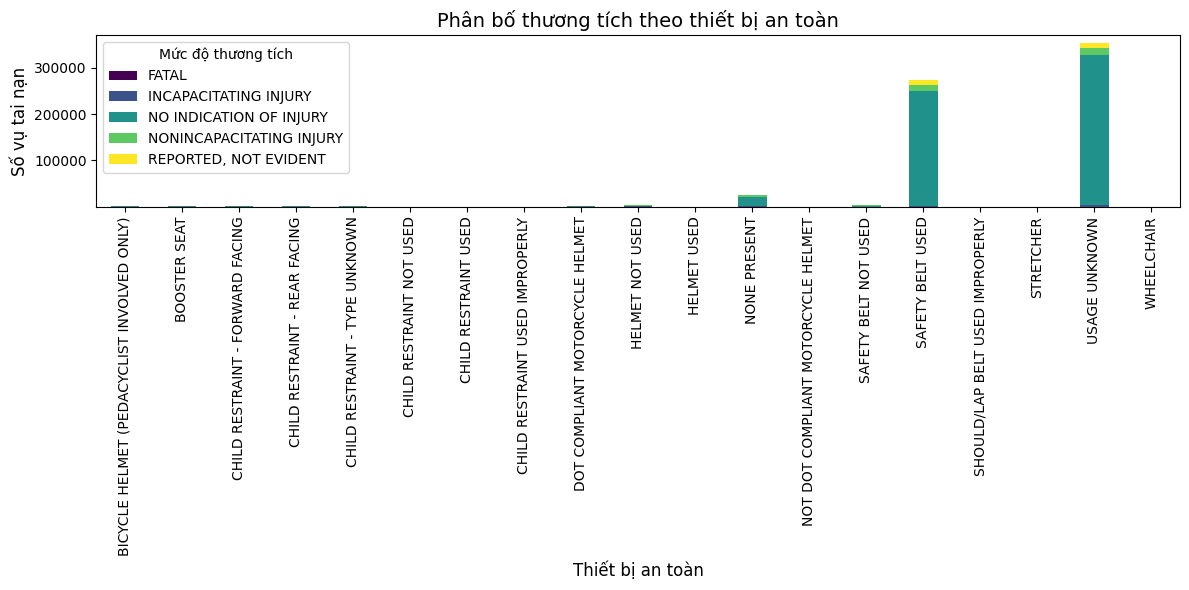

In [ ]:
import matplotlib.pyplot as plt

# Biểu đồ SAFETY_EQUIPMENT
safety_injury_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Phân bố thương tích theo thiết bị an toàn', fontsize=14)
plt.xlabel('Thiết bị an toàn', fontsize=12)
plt.ylabel('Số vụ tai nạn', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Mức độ thương tích', fontsize=10)
plt.tight_layout()
plt.show()

## Kịch bản 03: Phân Tích Mô Hình Thời Gian Tai Nạn
**Kịch bản:** Phân tích tần suất tai nạn dựa trên CRASH_DATE (Ngày xảy ra tai nạn) để phát hiện các mô hình (ví dụ: các tháng, ngày hoặc mùa có tỷ lệ tai nạn cao hơn).

**Thông tin rút ra:** Hiểu các xu hướng theo mùa hoặc các giai đoạn có rủi ro cao để thực hiện các biện pháp phòng ngừa.


## Kịch bản 04: Hành Vi Tài Xế và Nguyên Nhân Tai Nạn
**Kịch bản:** Nghiên cứu mối quan hệ giữa DRIVER_ACTION (Hành động của tài xế) và CRASH_RECORD_ID (Mã định danh vụ tai nạn) để xác định các lỗi phổ biến của tài xế dẫn đến tai nạn.

**Thông tin rút ra:** Cung cấp dữ liệu để cải thiện chương trình giáo dục tài xế và các biện pháp an toàn giao thông.

**Phân tích tần suất các hành động của tài xế**

**Mục tiêu**: Xác định hành vi phổ biến dẫn đến tai nạn.

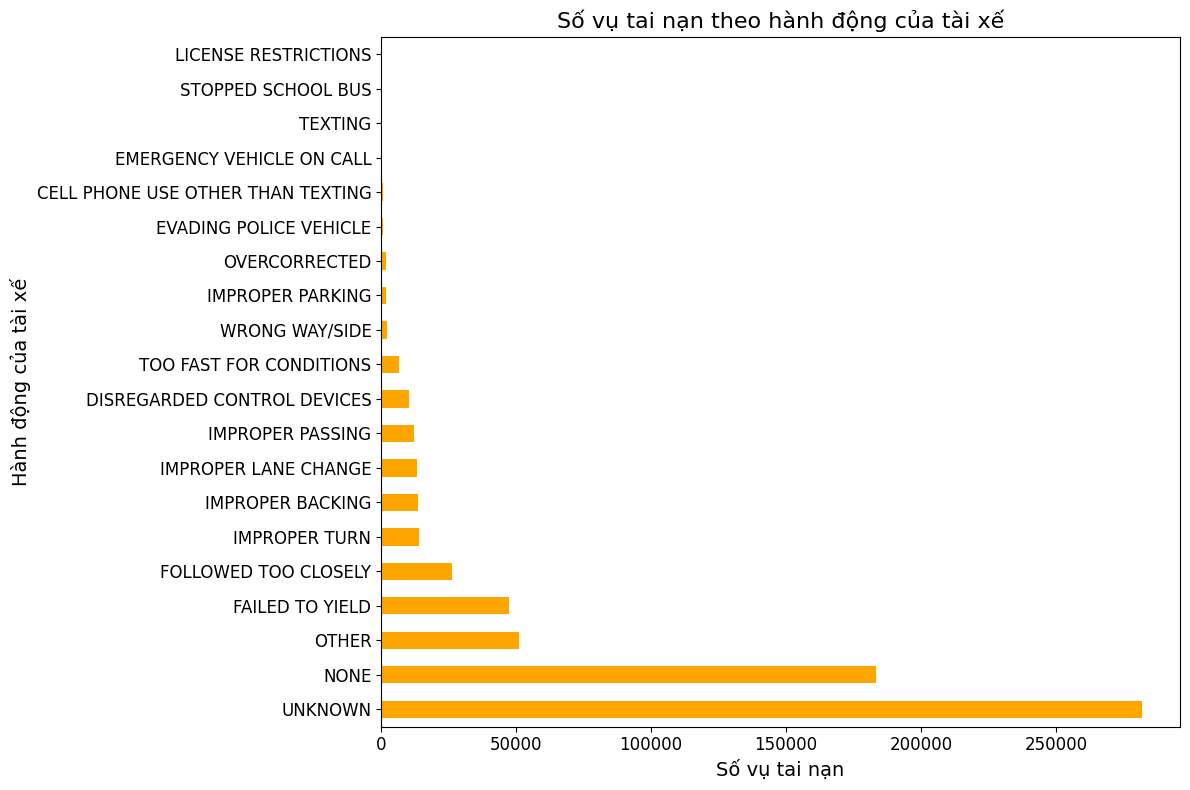

In [ ]:
# Đếm tần suất DRIVER_ACTION
driver_action_counts = cleaned_people_df['driver_action'].value_counts()

# Biểu đồ hành động tài xế
plt.figure(figsize=(12, 8))
driver_action_counts.plot(kind='barh', color='orange')
plt.title('Số vụ tai nạn theo hành động của tài xế', fontsize=16)
plt.xlabel('Số vụ tai nạn', fontsize=14)
plt.ylabel('Hành động của tài xế', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

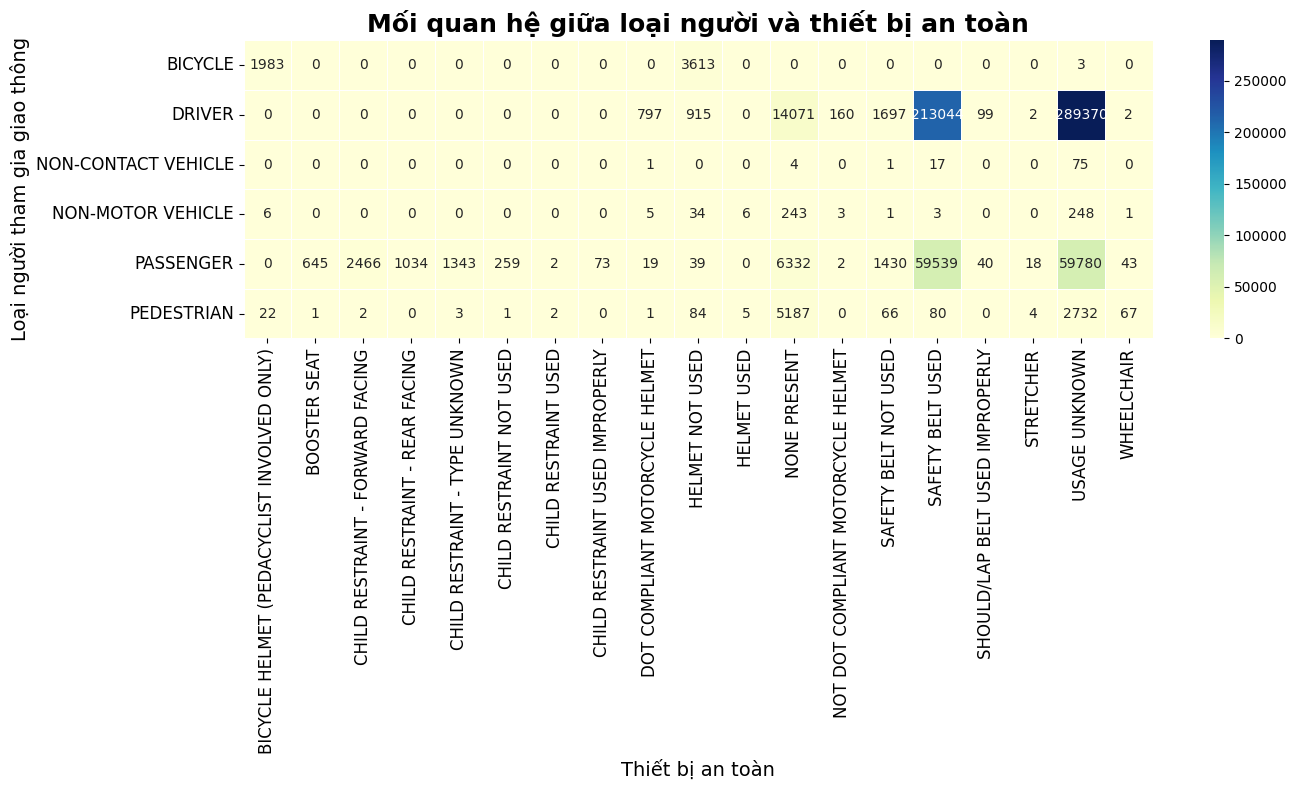

In [ ]:
safety_equipment_distribution = cleaned_people_df.groupby(['person_type', 'safety_equipment']).size().unstack(fill_value=0)

import seaborn as sns

# Vẽ Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(safety_equipment_distribution, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Mối quan hệ giữa loại người và thiết bị an toàn', fontsize=18, fontweight='bold')
plt.xlabel('Thiết bị an toàn', fontsize=14)
plt.ylabel('Loại người tham gia giao thông', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Kết luận**

* "Safety Belt Used" (Dây an toàn được sử dụng) là thiết bị an toàn phổ biến nhất, chủ yếu được sử dụng bởi tài xế (Driver).



## Kịch bản 06: Rủi Ro Bị Văng Khỏi Xe
**Kịch bản:** Nghiên cứu mối quan hệ giữa EJECTION (Tình trạng văng khỏi xe) và SAFETY_EQUIPMENT (Thiết bị an toàn) để xác định yếu tố nào làm tăng nguy cơ bị văng khỏi xe.

**Thông tin rút ra:** Nhấn mạnh tầm quan trọng của việc sử dụng thiết bị an toàn đúng cách để tránh bị văng khỏi xe.


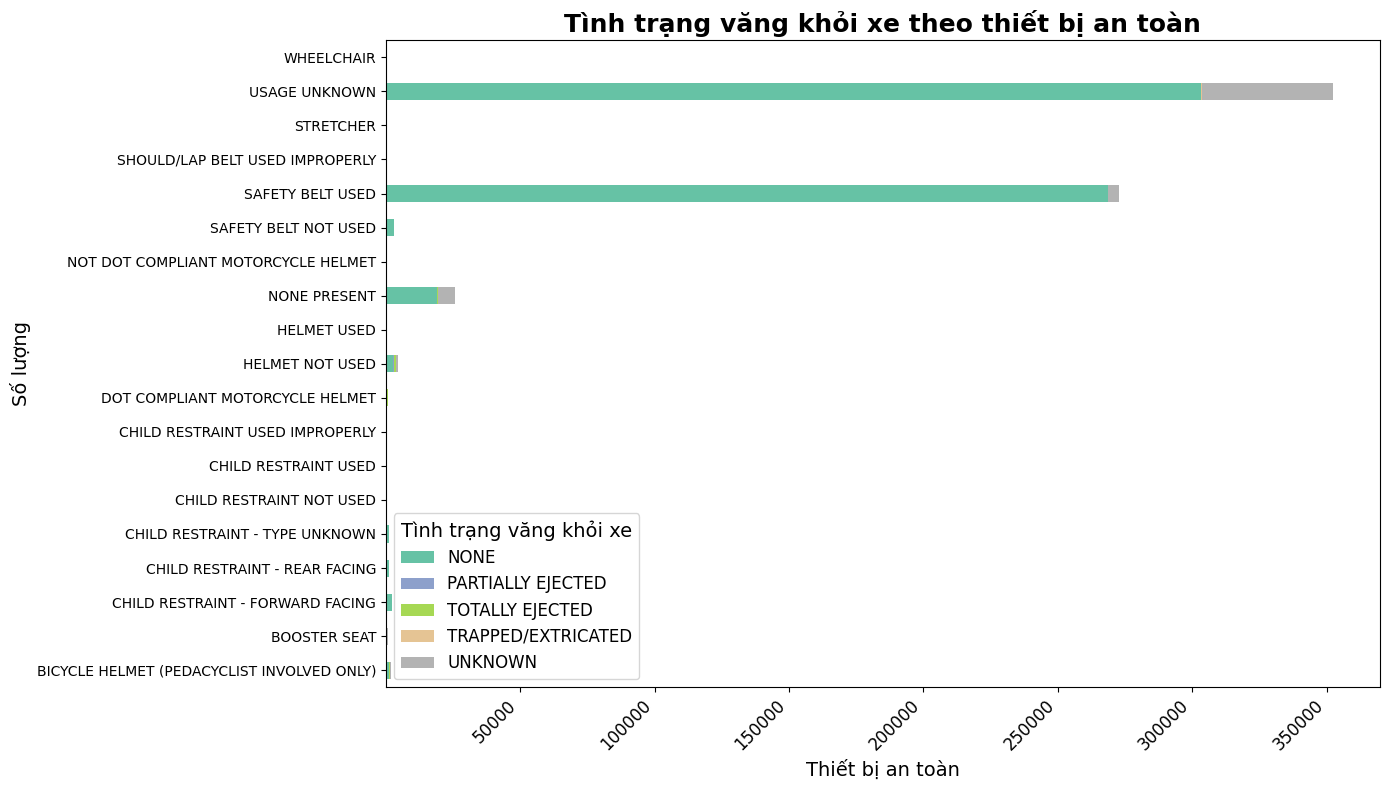

In [ ]:
ejection_distribution = cleaned_people_df.groupby(['safety_equipment', 'ejection']).size().unstack(fill_value=0)

# Vẽ biểu đồ Stacked Bar Chart
ejection_distribution.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Tình trạng văng khỏi xe theo thiết bị an toàn', fontsize=18, fontweight='bold')
plt.xlabel('Thiết bị an toàn', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Tình trạng văng khỏi xe', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

**Kết luận**

* Sử dụng dây an toàn (SAFETY BELT USED) có mối quan hệ mạnh mẽ với tình trạng NONE (Không bị văng khỏi xe). Điều này cho thấy dây an toàn là thiết bị hiệu quả nhất trong việc ngăn ngừa tình trạng văng khỏi xe.

* Các trường hợp SAFETY BELT NOT USED hoặc NONE PRESENT (Không có thiết bị an toàn) có sự xuất hiện ở các tình trạng PARTIALLY EJECTED và TOTALLY EJECTED.  có sự xuất hiện ở các tình trạng PARTIALLY EJECTED và TOTALLY EJECTED.


## Kịch bản 07: Hồ Sơ Rủi Ro Toàn Diện
**Kịch bản:** Xây dựng hồ sơ rủi ro cho các tai nạn bằng cách kết hợp các thuộc tính như AGE, SEX, DRIVER_ACTION, và PHYSICAL_CONDITION để xác định các cá nhân hoặc hành vi có rủi ro cao.

**Thông tin rút ra:** Phát triển mô hình dự đoán các kịch bản rủi ro cao và tập trung vào các biện pháp phòng ngừa.

## Kịch bản 08: Phân Tích Theo Loại Người


**Kịch bản:** So sánh INJURY_CLASSIFICATION (Phân loại mức độ thương tích) giữa các PERSON_TYPE (Loại người, ví dụ: tài xế, hành khách, người đi bộ) để xác định nhóm nào dễ bị tổn thương nhất trong các vụ tai nạn.

**Thông tin rút ra:** Hỗ trợ quy hoạch đô thị và các biện pháp an toàn giao thông để bảo vệ các nhóm đối tượng cụ thể.

In [ ]:
# Tạo bảng phân phối
person_injury_distribution = cleaned_people_df.groupby(['person_type', 'injury_classification']).size().unstack(fill_value=0)

# Chuyển đổi dữ liệu
person_injury_distribution_reset = person_injury_distribution.reset_index().melt(
    id_vars='person_type', var_name='Injury Classification', value_name='Count'
)

import plotly.express as px

# Vẽ biểu đồ Stacked Bar Chart bằng Plotly
fig = px.bar(
    person_injury_distribution_reset,
    x='person_type',
    y='Count',
    color='Injury Classification',
    title='Phân bố mức độ thương tích theo loại người',
    labels={
        'person_type': 'Loại người tham gia giao thông',
        'Count': 'Số vụ tai nạn',
        'Injury Classification': 'Mức độ thương tích'
    },
    barmode='stack',
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Tùy chỉnh giao diện
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=14,
    xaxis_tickangle=45
)

# Hiển thị biểu đồ
fig.show()


**Kết luận**

* Driver (Tài xế): Chiếm số lượng lớn nhất trong tất cả các loại người tham gia giao thông. Điều này hợp lý vì tài xế là nhóm trực tiếp điều khiển phương tiện và thường tham gia nhiều nhất vào giao thông. Trong nhóm tài xế, phần lớn các trường hợp không có thương tích đáng kể (NO INDICATION OF INJURY).

* Pedestrian (Người đi bộ): Dù số lượng nhỏ nhưng tỷ lệ thương tích nghiêm trọng hơn (FATAL và INCAPACITATING INJURY) chiếm phần đáng kể. Điều này cho thấy người đi bộ là nhóm dễ bị tổn thương nhất trong giao thông.

* Bicycle (Người đi xe đạp): Cũng có số lượng thương tích đáng kể, đặc biệt với mức thương tích không nhẹ (NONINCAPACITATING INJURY).

* Hành khách (Passenger) có số lượng thương tích thấp hơn tài xế, nhưng vẫn có các trường hợp nghiêm trọng.

* Hành khách có số lượng thương tích thấp hơn tài xế, nhưng vẫn có các trường hợp nghiêm trọng: Chiếm tỷ lệ rất thấp và ít tác động đến dữ liệu tổng thể.


## Kịch bản 09: Mô Hình Thời Gian Thương Tích
**Kịch bản:** Đánh giá cách INJURY_CLASSIFICATION thay đổi theo thời gian bằng cách nhóm dữ liệu theo CRASH_DATE để quan sát xu hướng mức độ thương tích.

**Thông tin rút ra:** Xác định xem các biện pháp an toàn giao thông qua thời gian đã hiệu quả hay chưa.

In [ ]:
# Chuyển đổi cột CRASH_DATE thành định dạng thời gian
cleaned_people_df['crash_date'] = pd.to_datetime(cleaned_people_df['crash_date'], errors='coerce')

# Loại bỏ giá trị thiếu trong cột CRASH_DATE hoặc INJURY_CLASSIFICATION
time_injury_df = cleaned_people_df.dropna(subset=['crash_date', 'injury_classification'])

# Thêm cột Năm
time_injury_df['YEAR'] = time_injury_df['crash_date'].dt.year


In [ ]:
# Nhóm dữ liệu theo YEAR và INJURY_CLASSIFICATION
yearly_injury_trend = time_injury_df.groupby(['YEAR', 'injury_classification']).size().unstack(fill_value=0)


In [ ]:
yearly_injury_trend

injury_classification,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
YEAR,,,,,
2022,151,2292,211723,12741,6927
2023,150,2282,221348,13588,7795
2024,96,1538,168849,10601,7644


In [ ]:
import plotly.express as px
import pandas as pd

# Chuyển đổi yearly_injury_trend thành DataFrame với định dạng phù hợp cho Plotly
yearly_injury_trend_reset = yearly_injury_trend.reset_index().melt(id_vars='YEAR', var_name='Injury Type', value_name='Count')

# Vẽ biểu đồ bằng Plotly
fig = px.line(
    yearly_injury_trend_reset,
    x='YEAR',
    y='Count',
    color='Injury Type',
    markers=True,
    title='Xu hướng mức độ thương tích theo thời gian (Năm)',
    labels={
        'YEAR': 'Năm',
        'Count': 'Số vụ tai nạn',
        'Injury Type': 'Mức độ thương tích'
    },
    template='plotly_white'
)

# Tùy chỉnh thêm
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=14
)

import plotly.express as px
import pandas as pd

# Chuyển đổi yearly_injury_trend thành DataFrame với định dạng phù hợp cho Plotly
yearly_injury_trend_reset = yearly_injury_trend.reset_index().melt(id_vars='YEAR', var_name='Injury Type', value_name='Count')

# Vẽ biểu đồ bằng Plotly
fig = px.line(
    yearly_injury_trend_reset,
    x='YEAR',
    y='Count',
    color='Injury Type',
    markers=True,
    title='Xu hướng mức độ thương tích theo thời gian (Năm)',
    labels={
        'YEAR': 'Năm',
        'Count': 'Số vụ tai nạn',
        'Injury Type': 'Mức độ thương tích'
    },
    template='plotly_white'
)

# Tùy chỉnh thêm
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=14
)

# Làm tròn trục x để chỉ hiển thị năm
fig.update_xaxes(
    tickmode='array',
    tickvals=[2022, 2023, 2024],  # Chỉ định các giá trị x mong muốn
    ticktext=['2022', '2023', '2024']  # Hiển thị dưới dạng số nguyên
)

# Hiển thị biểu đồ sau khi chỉnh sửa
fig.show()


**Kết luận**: Mức thương tích NO INDICATION OF INJURY có số lượng vượt trội so với các mức độ thương tích khác.

# Phân tích bộ dữ liệu Vehicle

## Kịch bản 01: Loại Phương Tiện và Mức Độ Tai Nạn
**Kịch bản:** Phân tích cách các VEHICLE_TYPE (Loại phương tiện) và FIRST_CONTACT_POINT (Vị trí đầu tiên bị tác động) góp phần vào các mô hình tai nạn. Ví dụ: liệu một số loại phương tiện có dễ bị tác động tại một vị trí cụ thể hơn không?

**Thông tin rút ra:** Hiểu được điểm yếu của phương tiện và đề xuất các cải tiến thiết kế.


In [ ]:
cleaned_vehicles_df.columns

Index(['crash_unit_id', 'crash_record_id', 'crash_date', 'unit_no',
       'unit_type', 'vehicle_id', 'make', 'model', 'vehicle_type',
       'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt',
       'first_contact_point'],
      dtype='object')

In [ ]:
cleaned_vehicles_df.head()

,crash_unit_id,crash_record_id,crash_date,unit_no,unit_type,vehicle_id,make,model,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,2023-12-06T15:24:00.000Z,1,DRIVER,1634931.0,NISSAN,SENTRA,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2023-12-06T16:00:00.000Z,2,DRIVER,1634978.0,CHRYSLER,SEBRING,PASSENGER,PERSONAL,S,PASSING/OVERTAKING,1.0,REAR-RIGHT-CORNER
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,2023-12-06T16:30:00.000Z,1,DRIVER,1634948.0,SUBARU,OUTBACK,PASSENGER,PERSONAL,W,TURNING RIGHT,1.0,FRONT
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10T12:12:00.000Z,1,DRIVER,1637401.0,TOYOTA,RAV4,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,SIDE-LEFT-FRONT
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10T12:12:00.000Z,2,DRIVER,1637408.0,SUBARU,OUTBACK,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER


In [ ]:
# Đếm tần suất kết hợp giữa vehicle_type và first_contact_point
analysis_df = cleaned_vehicles_df.dropna(subset=['first_contact_point']).groupby(
    ['vehicle_type', 'first_contact_point']
).size().reset_index(name='count')

In [ ]:
import plotly.graph_objects as go

# Chuyển dữ liệu sang dạng pivot để vẽ stacked bar chart
pivot_df = analysis_df.pivot(index='vehicle_type', columns='first_contact_point', values='count').fillna(0)


# Sắp xếp lại theo tổng tần suất giảm dần và lấy top 5
pivot_df_top5 = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).head(5).index]

# Tạo stacked bar chart với Plotly
fig = go.Figure()

# Thêm dữ liệu cho từng vị trí tác động
for column in pivot_df_top5.columns:
    fig.add_trace(go.Bar(
        y=pivot_df_top5.index,
        x=pivot_df_top5[column],
        name=column,
        orientation='h'  # Chuyển thành biểu đồ ngang
    ))

# Tùy chỉnh layout
fig.update_layout(
    barmode='stack',
    title='Tần suất theo loại phương tiện và vị trí tác động',
    xaxis_title='Tần suất',
    yaxis_title='Loại phương tiện',
    legend_title='Vị trí tác động',
    yaxis=dict(categoryorder='total ascending'),  # Sắp xếp theo tổng giá trị
)

# Hiển thị biểu đồ
fig.show()

**Nhận xét**:

* TOTAL (ALL Areas) chiếm số lượng đa số trong toàn bộ các loại phương tiện.

* Loại phương tiện PASSENGER có tần suất tác động cao nhất so với các loại khác. TOTAL (ALL AREAS) chiếm số lượng đa số. Các vị trí tác động còn lại đa số tập trung ở FRONT.

* SPORT UTILITY VEHICLE (SUV):Các vị trí như SIDE-LEFT, SIDE-RIGHT, REAR, và FRONT đều xuất hiện đáng kể. Phân bố cho thấy SUV có khả năng gặp va chạm ở cả hai bên hông (SIDE-LEFT, SIDE-RIGHT) do đặc điểm kích thước và thiết kế phương tiện.

* VAN/MINI-VAN: Có sự phân bố rõ ràng ở các vị trí hông xe, như SIDE-RIGHT-REAR và SIDE-LEFT. Vị trí tác động ở phía sau xe (REAR, REAR-RIGHT-CORNER) cũng chiếm một phần đáng kể, phù hợp với đặc điểm thường xuyên sử dụng để chở hàng hoặc hành khách, dễ bị va chạm từ phía sau.

* PICKUP: Phân bố vị trí tác động rất đa dạng, với tần suất tương đối đồng đều ở các vị trí như FRONT, REAR, SIDE-LEFT, và SIDE-RIGHT.


## Kịch bản 02: Phân Tích Nhà Sản Xuất
**Kịch bản:** Nghiên cứu tần suất tai nạn liên quan đến MAKE (Hãng xe) và MODEL (Mẫu xe) để xác định các thương hiệu phương tiện có nguy cơ cao.

**Thông tin rút ra:** Cung cấp thông tin phản hồi cho các nhà sản xuất để cải thiện độ an toàn hoặc tư vấn cho người tiêu dùng về các lựa chọn an toàn hơn.


In [ ]:
make_model_dataset = cleaned_vehicles_df[['make', 'model']]

# Loại bỏ các giá trị UNKNOWN OTHER trong cột MAKE
make_model_dataset = make_model_dataset[make_model_dataset['make'] != 'UNKNOWN']

# Tạo bảng đếm tần suất tai nạn theo Hãng xe và Mẫu xe
frequency = make_model_dataset.groupby(['make', 'model']).size().reset_index(name='accident_count')

# Sắp xếp theo số vụ tai nạn giảm dần
sorted_frequency = frequency.sort_values(by='accident_count', ascending=False)

top_10 = sorted_frequency.head(10)

# Vẽ biểu đồ bằng Plotly
fig = px.bar(
    top_10,
    x='accident_count',
    y=top_10['make'] + ' ' + top_10['model'],
    orientation='h',
    labels={"accident_count": "Số vụ tai nạn", "y": "Hãng và Mẫu xe"},
    title='Top 10 Hãng và Mẫu xe có tần suất tai nạn cao nhất',
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

**Nhận xét**: Biểu đồ trên cho thấy Toyota và Honda chiếm ưu thế với các mẫu xe như Camry, Corolla, Civic, và CR-V có số vụ tai nạn cao nhất. Các mẫu xe Mỹ như Chevrolet Malibu và Equinox cũng góp mặt.

## Kịch bản 03: Phân Tích An Toàn Theo Số Người Trên Xe
**Kịch bản:** Xem xét cách OCCUPANT_CNT (Số người trên xe) ảnh hưởng đến kết quả tai nạn, đặc biệt liên quan đến FIRST_CONTACT_POINT và VEHICLE_TYPE.

**Thông tin rút ra:** Đánh giá vai trò của số người trên xe trong các vụ tai nạn và hiệu quả của các thiết bị an toàn.

## Kịch bản 04: Sử Dụng Phương Tiện và Tai Nạn
**Kịch bản:** So sánh tỷ lệ tai nạn giữa các loại VEHICLE_USE (Mục đích sử dụng phương tiện), ví dụ: cá nhân, thương mại, hoặc dịch vụ khẩn cấp.

**Thông tin rút ra:** Làm nổi bật mức độ rủi ro liên quan đến các mẫu sử dụng phương tiện khác nhau.


In [ ]:
vehicle_use_df = cleaned_vehicles_df[['vehicle_use']]

# Loại bỏ các giá trị UNKNOWN OTHER trong cột MAKE
vehicle_use_df = vehicle_use_df.loc[~vehicle_use_df['vehicle_use'].isin(['UNKNOWN/NA', 'OTHER'])]

# Tạo bảng đếm tần suất tai nạn theo Hãng xe và Mẫu xe
frequency = vehicle_use_df.groupby(['vehicle_use']).size().reset_index(name='accident_count')

# Sắp xếp theo số vụ tai nạn giảm dần
sorted_frequency = frequency.sort_values(by='accident_count', ascending=False)

top_10 = sorted_frequency.head(10)

# Vẽ biểu đồ bằng Plotly
fig = px.bar(
    top_10,
    x='accident_count',
    y='vehicle_use',
    orientation='h',
    labels={"accident_count": "Số vụ tai nạn", "vehicle_use": "Loại phương tiện"},
    title='Top 10 Loại phương tiện có tần suất tai nạn cao nhất',
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

**Nhận xét**

* Loại phương tiện "PERSONAL" (phương tiện cá nhân) có số vụ tai nạn cao vượt trội, chiếm phần lớn tổng số vụ tai nạn so với các loại khác. Đây là nhóm phương tiện phổ biến nhất nên dễ xảy ra tai nạn hơn.


* Các phương tiện không tham gia giao thông (NOT IN USE) vẫn có tần suất cao va chạm giao thông.

* Các loại phương tiện còn lại có tần suất thấp hơn đáng kể so với 2 loại phương tiện nêu trên.

## Kịch bản 05: Hướng Di Chuyển và Xu Hướng Va Chạm
**Kịch bản:** Điều tra mối quan hệ giữa TRAVEL_DIRECTION (Hướng di chuyển) và FIRST_CONTACT_POINT để xác định các kịch bản va chạm phổ biến (ví dụ: va chạm trực diện, va chạm bên hông).

**Thông tin rút ra:** Hiểu các nhược điểm thiết kế đường hoặc nguy cơ theo hướng di chuyển

In [ ]:
# Tạo bảng tần suất
freq_table = pd.crosstab(cleaned_vehicles_df['travel_direction'], cleaned_vehicles_df['first_contact_point'])

# Hiển thị bảng tần suất
freq_table


first_contact_point,FRONT,FRONT-LEFT,FRONT-LEFT-CORNER,FRONT-RIGHT,FRONT-RIGHT-CORNER,NONE,OTHER,REAR,REAR-LEFT,REAR-LEFT-CORNER,REAR-RIGHT,REAR-RIGHT-CORNER,ROOF,SIDE-LEFT,SIDE-LEFT-FRONT,SIDE-LEFT-REAR,SIDE-RIGHT,SIDE-RIGHT-FRONT,SIDE-RIGHT-REAR,TOP,TOTAL (ALL AREAS),UNDER CARRIAGE,UNKNOWN
travel_direction,,,,,,,,,,,,,,,,,,,,,,,
E,26916,1,14877,1,14359,726,733,17394,1,6343,1,4588,3,8984,2433,3529,8583,2025,2736,322,627,137,7760
N,29944,0,16808,0,16730,862,871,19967,7,7290,0,5449,4,10646,2659,4100,10071,2336,3035,255,857,203,9578
NE,888,0,1012,0,900,26,33,464,0,298,0,246,1,401,127,185,473,135,199,10,18,8,303
NW,1234,0,1183,0,1137,53,46,693,0,362,0,325,0,531,167,236,567,161,216,10,24,14,559
S,29879,5,16345,2,16396,837,855,19450,7,7197,2,5186,4,10297,2746,3937,9694,2426,3004,289,847,213,9721
SE,1552,0,1183,0,1200,50,44,859,0,388,0,361,0,536,208,244,590,172,233,6,36,9,394
SW,1086,0,1019,0,946,42,36,536,0,313,0,295,0,438,150,172,535,125,194,10,20,5,319
UNKNOWN,4991,0,3070,0,2837,268,250,5153,0,2423,0,1569,1,2527,547,1240,2014,353,773,65,124,107,29567
W,27243,1,14736,0,14636,789,707,17640,4,6437,0,4561,3,9135,2453,3495,8814,2154,2787,297,712,128,8242


In [ ]:
import plotly.express as px

# Chuyển đổi bảng tần suất thành định dạng phù hợp với Plotly
freq_table_reset = freq_table.reset_index().melt(id_vars='travel_direction', var_name='first_contact_point', value_name='Frequency')

# Loại bỏ các giá trị 'UNKNOWN', 'NONE', và 'OTHER' trong các cột tương ứng
freq_table_reset = freq_table_reset.loc[
    ~freq_table_reset['travel_direction'].isin(['UNKNOWN']) &  # Loại bỏ 'UNKNOWN' trong travel_direction
    ~freq_table_reset['first_contact_point'].isin(['NONE', 'OTHER'])  # Loại bỏ 'NONE' và 'OTHER' trong first_contact_point
]

# Tạo lại bảng tần suất sau khi lọc
filtered_freq_table = freq_table_reset.pivot_table(index='travel_direction', columns='first_contact_point', values='Frequency', fill_value=0)

# Vẽ heatmap với Plotly
fig = px.imshow(
    filtered_freq_table.values,
    labels=dict(x="Điểm va chạm", y="Hướng di chuyển", color="Tần suất"),
    x=filtered_freq_table.columns,
    y=filtered_freq_table.index,
    color_continuous_scale="YlGnBu",
    text_auto=True,
    title="Mối quan hệ giữa travel_direction và first_contact_point (sau khi loại bỏ NONE và OTHER)",
)

# Phóng to biểu đồ
fig.update_layout(
    width=1200,  # Tăng chiều rộng
    height=1000,  # Tăng chiều cao
    title_x=0.5,  # Canh giữa tiêu đề
)

fig.update_xaxes(tickangle=-70)  # Xoay giá trị trên trục x -45 độ (hoặc tùy chỉnh góc)

# Hiển thị biểu đồ
fig.show()


**Nhận xét**

* Tai nạn trực diện (FRONT) là loại phổ biến nhất trên tất cả các hướng di chuyển, đặc biệt trên các tuyến đường lớn (North, South, East, West).


## Kịch bản 06: Phân Tích Hành Động Trước Tai Nạn
**Kịch bản:** Phân tích các hành động MANEUVER (Hành động trước tai nạn) của phương tiện để xác định các hành vi có nguy cơ cao.

**Thông tin rút ra:** Cải thiện chương trình đào tạo lái xe và các quy định giao thông để giảm thiểu các hành vi này.

In [ ]:
cleaned_vehicles_df['maneuver'].value_counts()

,count
maneuver,
STRAIGHT AHEAD,291741
PARKED,83592
UNKNOWN/NA,50914
SLOW/STOP IN TRAFFIC,39281
TURNING LEFT,38040
BACKING,22438
TURNING RIGHT,20990
PASSING/OVERTAKING,15449
CHANGING LANES,10993


In [ ]:
import pandas as pd
import plotly.express as px

# Giả sử dữ liệu ban đầu được lưu trong DataFrame df
# Tính tần suất của mỗi hành động (maneuver) theo loại phương tiện (vehicle_type)
stacked_data = cleaned_vehicles_df.groupby(['maneuver', 'vehicle_type']).size().reset_index(name='Frequency')

# Tính tổng tần suất cho từng hành động
top_maneuvers = (
    stacked_data.groupby('maneuver')['Frequency']
    .sum()
    .reset_index()
    .sort_values(by='Frequency', ascending=False)
    .head(5)  # Lấy Top 5 hành động có tần suất cao nhất
)

# Lọc dữ liệu chỉ với Top 5 hành động
filtered_data = stacked_data[stacked_data['maneuver'].isin(top_maneuvers['maneuver'])]

# Vẽ biểu đồ cột chồng
fig = px.bar(
    filtered_data,
    x='maneuver',
    y='Frequency',
    color='vehicle_type',  # Màu sắc phân biệt theo loại phương tiện
    title="Phân tích Top 5 hành động và loại phương tiện (Biểu đồ cột chồng)",
    labels={'maneuver': 'Hành động (maneuver)', 'Frequency': 'Số vụ tai nạn'},
    barmode='stack',  # Chế độ chồng cột
    fig = px.colors.sequential.Plasma
)

# Tùy chỉnh giao diện
fig.update_layout(
    autosize=True,  # Kích cỡ biểu đồ tự động
    xaxis_tickangle=-70,  # Xoay nhãn trên trục X để dễ đọc hơn
    title_x=0.5,  # Căn giữa tiêu đề
    margin=dict(l=0, r=0, t=50, b=50)  # Giảm lề để hiển thị tối ưu
)

# Hiển thị biểu đồ
fig.show()


TypeError: bar() got an unexpected keyword argument 'fig'

In [ ]:
import pandas as pd
import plotly.express as px

# Giả sử dữ liệu ban đầu được lưu trong DataFrame df
# Tính tần suất của mỗi hành động (meneuver) theo loại phương tiện (vehicle_type)
stacked_data = cleaned_vehicles_df.groupby(['maneuver', 'vehicle_type']).size().reset_index(name='Frequency')

magenta_colors = ['#FF66CC', '#FF33CC', '#CC33FF', '#9900CC', '#660099']


# Vẽ biểu đồ cột chồng
fig = px.bar(
    stacked_data,
    x='maneuver',
    y='Frequency',
    color='vehicle_type',  # Màu sắc phân biệt theo loại phương tiện
    title="Phân tích hành động và loại phương tiện (Biểu đồ cột chồng)",
    labels={'meneuver': 'Hành động (mênuver)', 'Frequency': 'Số vụ tai nạn'},
    barmode='stack',  # Chế độ chồng cột
    color_discrete_sequence=magenta_colors  # Áp dụng bảng màu Magenta
)

# Tùy chỉnh giao diện
fig.update_layout(
    width=1200,  # Chiều rộng biểu đồ
    height=700,  # Chiều cao biểu đồ
    xaxis_tickangle=-45,  # Xoay nhãn trên trục X để dễ đọc hơn
    title_x=0.5  # Căn giữa tiêu đề
)

# Hiển thị biểu đồ
fig.show()


## Kịch bản 07: Xu Hướng Tai Nạn Theo Thời Gian
**Kịch bản:** Nghiên cứu các vụ tai nạn theo thời gian (CRASH_DATE) để xác định thời điểm xảy ra nhiều tai nạn nhất (ví dụ: các tháng, ngày hoặc giờ cụ thể).

**Thông tin rút ra:** Phát hiện các mô hình rủi ro theo thời gian để thực hiện các biện pháp can thiệp phù hợp.


**Note Pre Processing**

In [ ]:
cleaned_vehicles_df['crash_date'] = pd.to_datetime(cleaned_vehicles_df['crash_date'])

In [ ]:
crash_date_df = cleaned_vehicles_df['crash_date'].copy()

In [ ]:
crash_date_df = pd.DataFrame(crash_date_df)

In [ ]:
crash_date_df['crash_date']

,crash_date
0,2023-12-06 15:24:00+00:00
1,2023-12-06 16:00:00+00:00
2,2023-12-06 16:30:00+00:00
3,2023-12-10 12:12:00+00:00
4,2023-12-10 12:12:00+00:00
...,...
614489,2024-09-30 01:13:00+00:00
614490,2024-09-30 01:30:00+00:00
614491,2024-09-30 01:30:00+00:00
614492,2024-09-30 01:26:00+00:00


In [ ]:
crash_counts

,year,month,crash_count
0,2022,1,16406
1,2022,2,15877
2,2022,3,17176
3,2022,4,17125
4,2022,5,19882
5,2022,6,19353
6,2022,7,18676
7,2022,8,18556
8,2022,9,19324
9,2022,10,19897


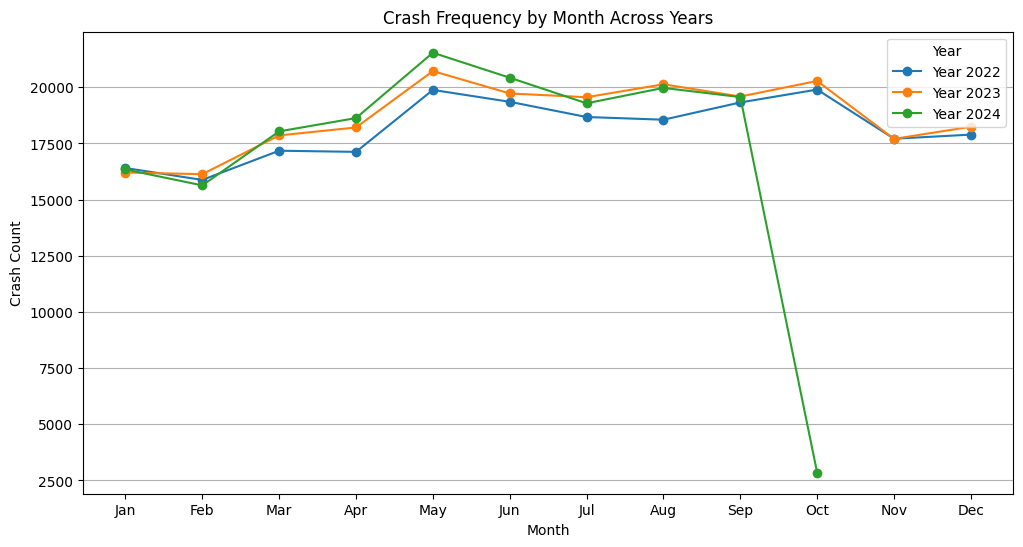

In [ ]:
# Vẽ biểu đồ line thể hiện tần suất vụ tai nạn theo tháng qua từng năm
plt.figure(figsize=(12, 6))
for year in crash_counts['year'].unique():
    year_data = crash_counts[crash_counts['year'] == year]
    plt.plot(year_data['month'], year_data['crash_count'], marker='o', label=f"Year {year}")

# Thêm các thông tin biểu đồ
plt.title("Crash Frequency by Month Across Years")
plt.xlabel("Month")
plt.ylabel("Crash Count")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")
plt.grid(axis='y')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thêm các cột thời gian

crash_date_df['month'] = crash_date_df['crash_date'].dt.month
crash_date_df['day_of_week'] = crash_date_df['crash_date'].dt.day_name()
crash_date_df['hour'] = crash_date_df['crash_date'].dt.hour
crash_date_df['year'] = crash_date_df['crash_date'].dt.year

crash_counts = crash_date_df.groupby(['year', 'month']).size().reset_index(name='crash_count')




# # Tổng số vụ tai nạn theo tháng
# crashes_by_month = crash_date_df.groupby('month')['crash_count'].sum()

# # Tổng số vụ tai nạn theo ngày trong tuần
# crashes_by_day = crash_date_df.groupby('day_of_week')['crash_count'].sum()

# # Tổng số vụ tai nạn theo giờ trong ngày
# crashes_by_hour = crash_date_df.groupby('hour')['crash_count'].sum()

# # Biểu đồ cột: Số vụ tai nạn theo tháng
# plt.figure(figsize=(10, 6))
# crashes_by_month.plot(kind='bar', color='skyblue')
# plt.title('Number of Crashes by Month')
# plt.xlabel('Month')
# plt.ylabel('Number of Crashes')
# plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.grid(axis='y')
# plt.show()

# # Biểu đồ cột: Số vụ tai nạn theo ngày trong tuần
# plt.figure(figsize=(10, 6))
# crashes_by_day = crashes_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# crashes_by_day.plot(kind='bar', color='salmon')
# plt.title('Number of Crashes by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Number of Crashes')
# plt.grid(axis='y')
# plt.show()

# # Biểu đồ đường: Số vụ tai nạn theo giờ trong ngày
# plt.figure(figsize=(10, 6))
# crashes_by_hour.plot(kind='line', marker='o', color='green')
# plt.title('Number of Crashes by Hour of the Day')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Number of Crashes')
# plt.xticks(range(0, 24))
# plt.grid(axis='y')
# plt.show()

# # Biểu đồ nhiệt: Số vụ tai nạn theo ngày trong tuần và giờ
# heatmap_data = crash_date_df.groupby(['day_of_week', 'hour'])['crash_count'].sum().unstack()
# heatmap_data = heatmap_data.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Number of Crashes'})
# plt.title('Heatmap of Crashes by Day of the Week and Hour')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Day of the Week')
# plt.show()


In [ ]:
# Thêm các cột thời gian
cleaned_vehicles_df.head()

,crash_unit_id,crash_record_id,crash_date,unit_no,unit_type,vehicle_id,make,model,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point,month,day_of_week,hour
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,2023-12-06 15:24:00+00:00,1,DRIVER,1634931.0,NISSAN,SENTRA,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,1.0,FRONT,12,Wednesday,15
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,2023-12-06 16:00:00+00:00,2,DRIVER,1634978.0,CHRYSLER,SEBRING,PASSENGER,PERSONAL,S,PASSING/OVERTAKING,1.0,REAR-RIGHT-CORNER,12,Wednesday,16
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,2023-12-06 16:30:00+00:00,1,DRIVER,1634948.0,SUBARU,OUTBACK,PASSENGER,PERSONAL,W,TURNING RIGHT,1.0,FRONT,12,Wednesday,16
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10 12:12:00+00:00,1,DRIVER,1637401.0,TOYOTA,RAV4,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,1.0,SIDE-LEFT-FRONT,12,Sunday,12
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,2023-12-10 12:12:00+00:00,2,DRIVER,1637408.0,SUBARU,OUTBACK,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,1.0,FRONT-LEFT-CORNER,12,Sunday,12


Phân tích các tháng có xu hướng tai nạn nhiều

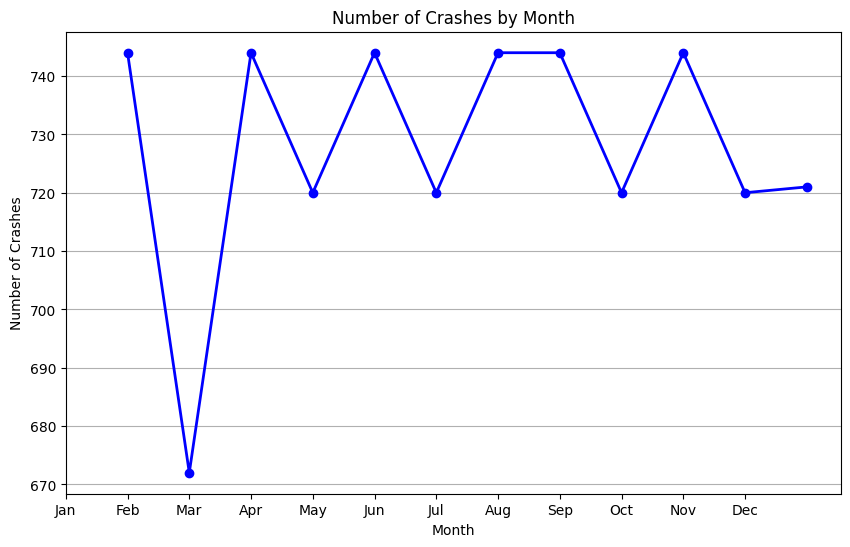

In [ ]:
# Biểu đồ đường: Số vụ tai nạn theo tháng
plt.figure(figsize=(10, 6))
crashes_by_month.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


In [ ]:
crashes_by_month

,crash_count
month,
1,744
2,672
3,744
4,720
5,744
6,720
7,744
8,744
9,720
